<a href="https://colab.research.google.com/github/DiogoMonteiro99/repos/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science Academy**

## **Fundamentos de Linguagem Python Para Análise de Dados e Data Science**

##**Introdução a Deep Learning com TensorFlow**

Problema de Negócio:

Construir um modelo de inteligência Artificial capaz de classificar imagens considerando 10 categorias: [ 'airplane', 'automobile', 'bird', 'cat', 'dog', 'deer', 'frog', 'horse', 'ship', 'truck']. Dada uma nova imagem de uma dessas categorias o modelo deve ser capaz de classificar e indicar o que é a imagem.

-----

#**Importando as bibliotecas**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# **Carregando os dados**

In [ ]:
# Carregando o dataset CIFAR10
(imagens_treino,labels_treino), (imagens_teste,labels_teste) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


In [ ]:
# Classe das Imagens
nomes_classes =[ 'airplane', 'automobile', 'bird', 'cat', 'dog', 'deer', 'frog', 'horse', 'ship', 'truck']

# **Pré Processamento e Visualização das Imagens**

In [ ]:
# Normalizando os valores do pixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

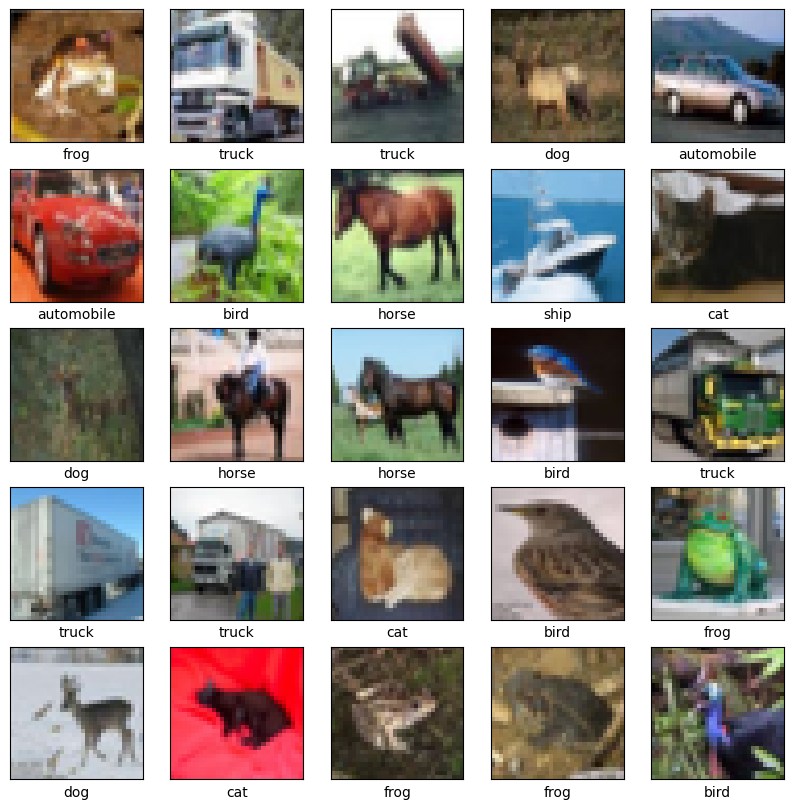

In [ ]:
# Função para exibir as imagens
def visualizar_imagens(imagens,labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagens[i],cmap=plt.cm.binary)
    plt.xlabel(nomes_classes[labels[i][0]])
  plt.show()
visualizar_imagens(imagens=imagens_treino,labels=labels_treino)

# **Construção do modelo**

In [ ]:
# Modelo

# Cria objeto de sequencia de camadas
modelo = models.Sequential()

# Adiciona o primeiro bloco de convulução e max pooling (camada de entrada)
modelo.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (32,32,3)))
modelo.add(layers.MaxPooling2D((2,2)))

# Adiciona o segundo bloco de convulução e max pooling (camada intermediária)
modelo.add(layers.Conv2D(64,(3,3), activation = 'relu'))
modelo.add(layers.MaxPooling2D((2,2)))

# Adiciona o terceiro bloco de convulução e max pooling (camada intermediária)
modelo.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo.add(layers.MaxPooling2D((2,2)))


In [ ]:
# Adicionar camadas de classificação
modelo.add(layers.Flatten())
modelo.add(layers.Dense(64, activation ='relu'))
modelo.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
# Criando um sumário do modelo
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

In [ ]:
#compilação do modelo
modelo.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
%%time
history = modelo.fit(imagens_treino,labels_treino,epochs=10,validation_data = (imagens_teste,labels_teste))

Epoch 1/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.5228 - accuracy: 0.4465 - val_loss: 1.2823 - val_accuracy: 0.5407
Epoch 2/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.1596 - accuracy: 0.5896 - val_loss: 1.0618 - val_accuracy: 0.6328
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0060 - accuracy: 0.6509 - val_loss: 1.0084 - val_accuracy: 0.6554
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9077 - accuracy: 0.6848 - val_loss: 0.9662 - val_accuracy: 0.6691
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8364 - accuracy: 0.7093 - val_loss: 0.9167 - val_accuracy: 0.6868
Epoch 6/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7747 - accuracy: 0.7307 - val_loss: 0.8692 - val_accuracy: 0.7067
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7236 - accuracy: 0.7470 - val_loss: 0.8516 -

### Avalidação do modelo

In [ ]:
# Avaliando o modelo
erro_teste,acc_teste = modelo.evaluate(imagens_teste, labels_teste, verbose = 2)

313/313 - 4s - loss: 0.8952 - accuracy: 0.7132 - 4s/epoch - 13ms/step


In [ ]:
print('\n Acurácia com Dados de Teste:', round(acc_teste,2))


 Acurácia com Dados de Teste: 0.71


# **Deploy do Modelo**

In [ ]:
# Carregando uma nova imagem
nova_imagem = Image.open('/content/drive/MyDrive/Colab Notebooks/nova_imagem.jpg')

In [ ]:
# Dimenções da imagem (em pixels)
nova_imagem.size

(1919, 1199)

In [ ]:
# Obtendo altura e largura da imagem
altura = nova_imagem.height
largura = nova_imagem.width

In [ ]:
print(f'A altura da imagem é: {altura}')
print(f'A largura da imagem é: {largura}')

A altura da imagem é: 1199
A largura da imagem é: 1919


In [ ]:
# Redimensionando para 32x32 pixels
nova_imagem = nova_imagem.resize((32,32))

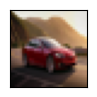

In [ ]:
# Exibir a imagem
plt.figure(figsize =(1,1))
plt.imshow(nova_imagem)
plt.xticks([])
plt.yticks([])
plt.show()


In [ ]:
# Convertendo a imagem para um arrey NumPy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0

In [ ]:
# Expande a dimensão do arrey para que ele tenha o formato(1,32,32,3)
nova_imagem_array = np.expand_dims(nova_imagem_array,axis=0)

In [ ]:
# Previsões
previsoes = modelo.predict(nova_imagem_array)

1/1 [==============================] - 0s 139ms/step


In [ ]:
print(previsoes)

[[1.6798024e-04 9.9906725e-01 2.8053847e-07 6.3190538e-07 8.6772680e-08
  7.6556432e-09 1.7296665e-05 2.1772363e-08 4.3545521e-04 3.1109943e-04]]


In [ ]:
# Obtendo a classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]

In [ ]:
print(f' A nova imagem foi classificada como: {nome_classe_prevista}')

 A nova imagem foi classificada como: automobile


# **FIM**